# Library

In [ ]:
import pandas as pd
import numpy as np
from bertopic import BERTopic

# 2 Baseline Summary

## Clustering Approach

- **Parameter Setting**:
  - Embedding Model: all-MiniLM-L6-v2
  - Representation Model: keyBERTInspired, MaximalMarginalRelevance
  - Count Vectorizer
  - CtfIDF
  - UMAP: 20 neighbors, 10 components
  - HDBSCAN: 150 min cluster size
  - Zero-Shot Classification on cluster name
  - Outliers-reduction with Cosine Similarity: 0.46 threshold

## Clustering Results

- **Clusters Retrieved**: 68 in which the most important ones concern:
  1. Drug sales (marijuana, cocaine, xanax, pills, meth, fentanyl)
  2. Bitcoin
  3. Scammers and seller reviews
  4. Marketplace advertising
  5. Purchase reviews
  6. Drug purchases
  7. Orders
  8. Closed sites (empire market, 
  9. Scams
  10. Sold passwords
  11. Hacker attacks
  12. Opsec questions
  13. Document and credit card forgery
  14. Chat links

- **Performance Metrics**:
  - **Silhouette Score**: 0.50
  - **Davies-Bouldin Score**: 0.87
  - **Coherence-Score**: 0.57
  - **Dos Score**: 0.06
  - **%Outliers**: 0.30 (19k/65k)

# Code

In order to avoid importing the whole **BERTopicUtils.py** module, and thus the linked libraries, I have only brought back the function needed to make predictions, it is the same as in the module

In [2]:
def predict_topic(topic_model: BERTopic, sentence: list, num_classes: int = 5, custom_labels: bool = False) -> pd.DataFrame:
    """
    Predict the topic of a sentence using the BERTopic model.
    :param topic_model: The BERTopic model.
    :param sentence: The sentence to predict the topic of.
    :param num_classes: The number of classes to return.
    :param custom_labels: Whether to use custom labels.
    :return: A DataFrame with the predicted topics.
    """
    # Transform the sentence
    _, pr = topic_model.transform(sentence)

    # Get the top indices
    top_indices = np.argsort(pr[0])[::-1][:num_classes]

    # Get the top topics
    if custom_labels:
        top_topics = [(topic_model.get_topic(i), pr[0][i], topic_model.custom_labels_[i+1]) for i in top_indices]
    else:
        top_topics = [(topic_model.get_topic(i), pr[0][i], topic_model.generate_topic_labels()[i+1]) for i in top_indices]
    
    # Create a DataFrame with the results
    df_finals = pd.DataFrame(top_topics, columns=['Topic', 'Probability', 'Label'])

    # Extract the words and sentence
    df_finals['Words'] = df_finals['Topic'].apply(lambda topic: [word for word, _ in topic])

    df_finals['Sentence'] = sentence * len(df_finals)
    
    return df_finals

# Visualize CSV Files

In [41]:
descr_topic = pd.read_csv('CSV68Topic/description_topic.csv')
document_topic = pd.read_csv('CSV68Topic/document_topic_proba.csv')
topics_over_time = pd.read_csv('CSV68Topic/topic_over_time_3.csv')

In [42]:
print(descr_topic.shape[0])
descr_topic.head()

68


,Topic,Count,BERTopic_Name,Representation,Representative_Docs,Custom_Name_GenAI,Custom_Name_Zero_Shot
0,56,242,56_apollon_apollon market_market_apollon apollon,['apollon' 'apollon market' 'market' 'apollon ...,['back apollon' 'apollon' 'apollon market'],Apollon Market,market - apollon - apollon market
1,24,544,24_coke_coke vendor_best coke_uk coke,['coke' 'coke vendor' 'best coke' 'uk coke' 'u...,['fire coke' 'coke vendor ' 'coke vendor'],Coke Topic,cocaine
2,62,290,62_alprazolam_powder_alprazolam powder_flualpr...,['alprazolam' 'powder' 'alprazolam powder' 'fl...,['usa domestic alprazolam powder mxe apvp inbo...,Alprazolam Powder,powder - alprazolam - alprazolam powder
3,0,5021,0_weed_cannabis_cart_thc,['weed' 'cannabis' 'cart' 'thc' 'review' 'hash...,['product vendor review ml lemon kush wax vape...,Cannabis Weed Vape Cart Reviews,marijuana
4,16,998,16_review_vendor review_review vendor_vendor,['review' 'vendor review' 'review vendor' 'ven...,['xpost danknation vendor review sunaero multi...,Vendor Reviews Product,reviews vendor


In [44]:
print(document_topic.shape[0])
document_topic.head()

46629


,Document,Topic,Probability,Created_on,BERTopic_Name
0,naturalmeds apollon,56,[1.19642027e-307 6.58965022e-308 7.28015586e-3...,2020-01-09,56_apollon_apollon market_market_apollon apollon
1,redemption btc giveaway coke sub dread member ...,24,[0.0065961 0.00376317 0.00431397 0.00327901 0...,2020-01-09,24_coke_coke vendor_best coke_uk coke
2,flubromazolam sample giveaway,62,[8.33571265e-308 7.43009529e-308 8.20561023e-3...,2019-11-06,62_alprazolam_powder_alprazolam powder_flualpr...
3,cigarette tobacco replica,0,[0.04007918 0.00797617 0.01040953 0.00632349 0...,2020-01-09,0_weed_cannabis_cart_thc
4,requiring image image review,16,[0.00675313 0.00730991 0.006758 0.00472002 0...,2019-11-06,16_review_vendor review_review vendor_vendor


In [45]:
print(topics_over_time.shape[0])
topics_over_time.head()

192


,Topic,Words,Frequency,Timestamp,Custom_Name_GenAI
0,0,"weed, cart, review, cannabis, thc",893,2019-08-05 17:55:40.800,Cannabis Weed Vape Cart Reviews
1,0,"weed, cannabis, cart, review, vendor",4118,2019-10-29 08:00:00.000,Cannabis Weed Vape Cart Reviews
2,0,"better, better weed, direct better, grower dir...",10,2020-01-21 16:00:00.000,Cannabis Weed Vape Cart Reviews
3,1,"help, sub, need, guy, back",381,2019-08-05 17:55:40.800,Subreddit Help Needed
4,1,"help, need, guy, sub, back",1646,2019-10-29 08:00:00.000,Subreddit Help Needed


# Visualize Graphs

In [46]:
topic_model = BERTopic.load("../../../Analyze_files/CombiningAnalysisCompleteDataset/ThreadAnalysis/Models/topic_model_all-MiniLM-L6-v2_150_20n")

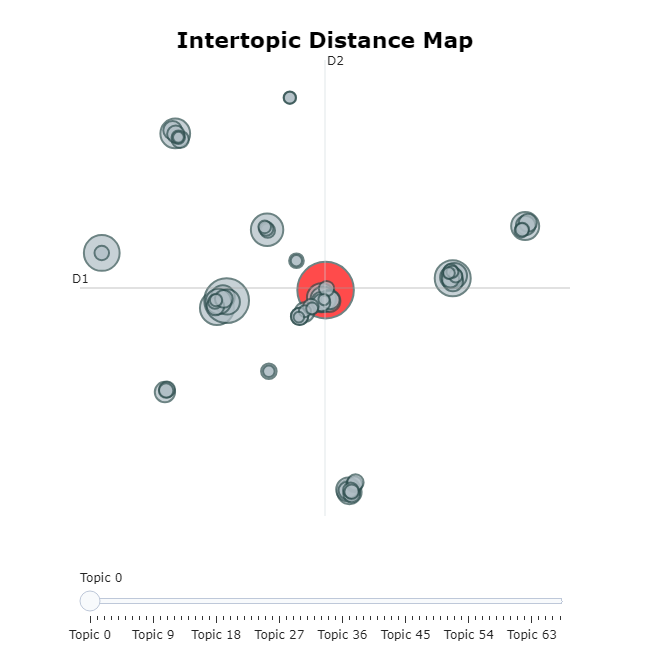

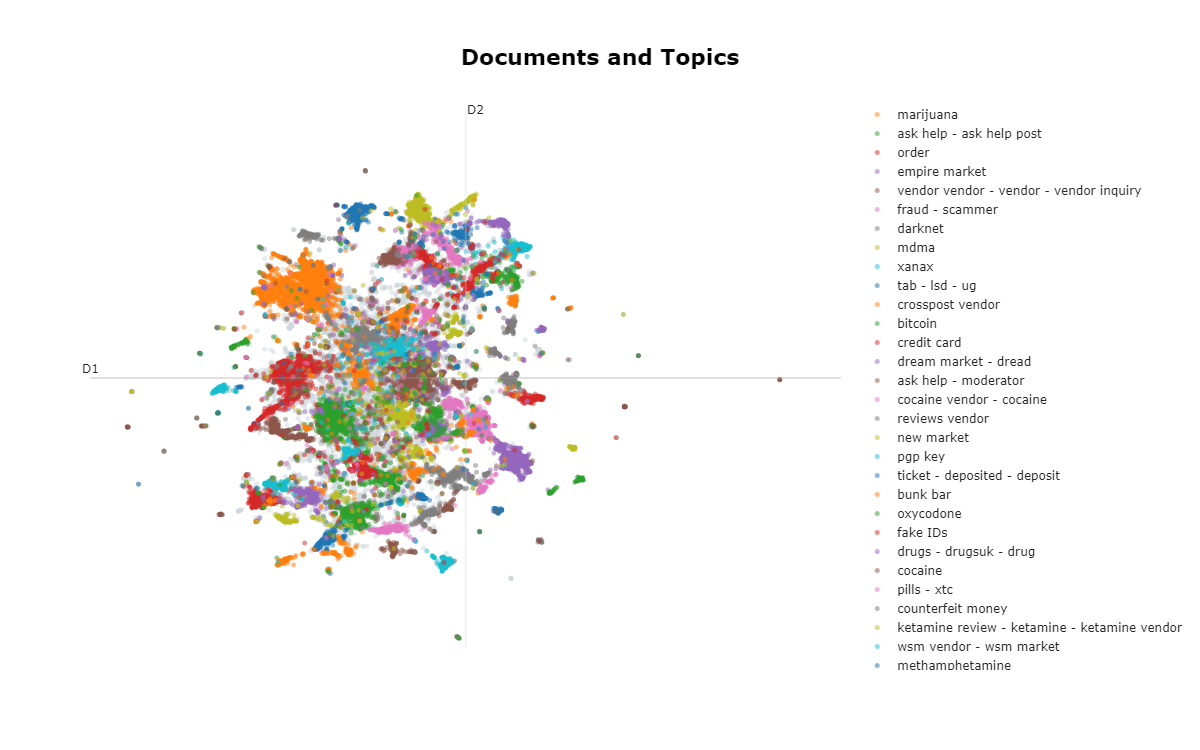

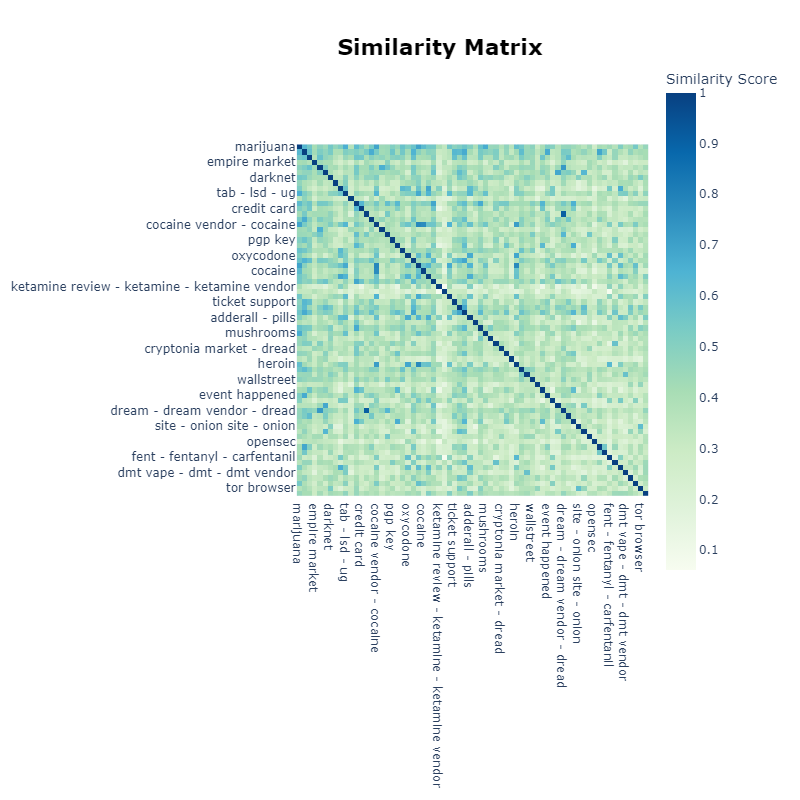

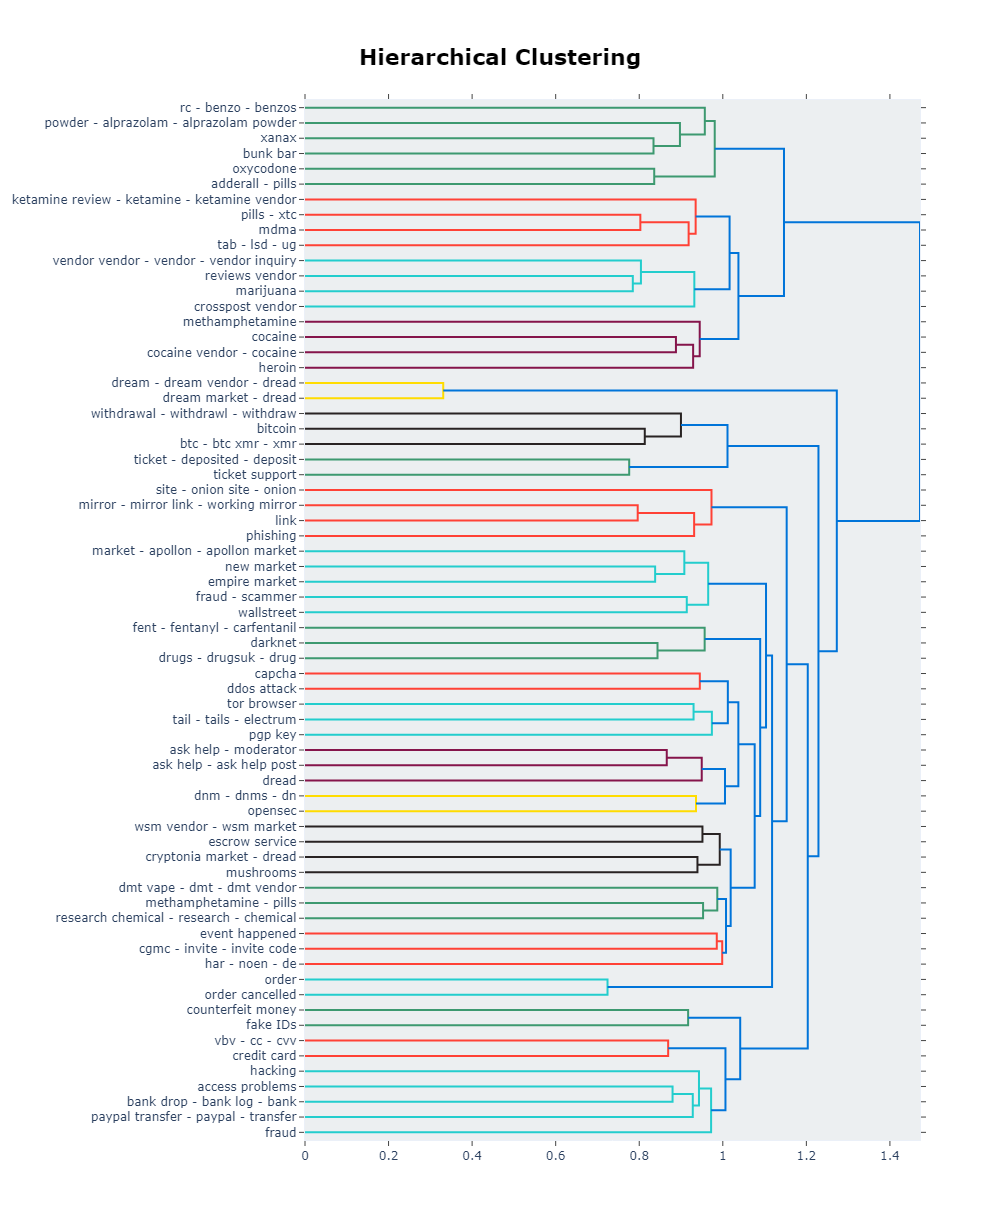

In [47]:
topic_model.visualize_barchart(top_n_topics=70, custom_labels=True, n_words=10, width=350, height=350)

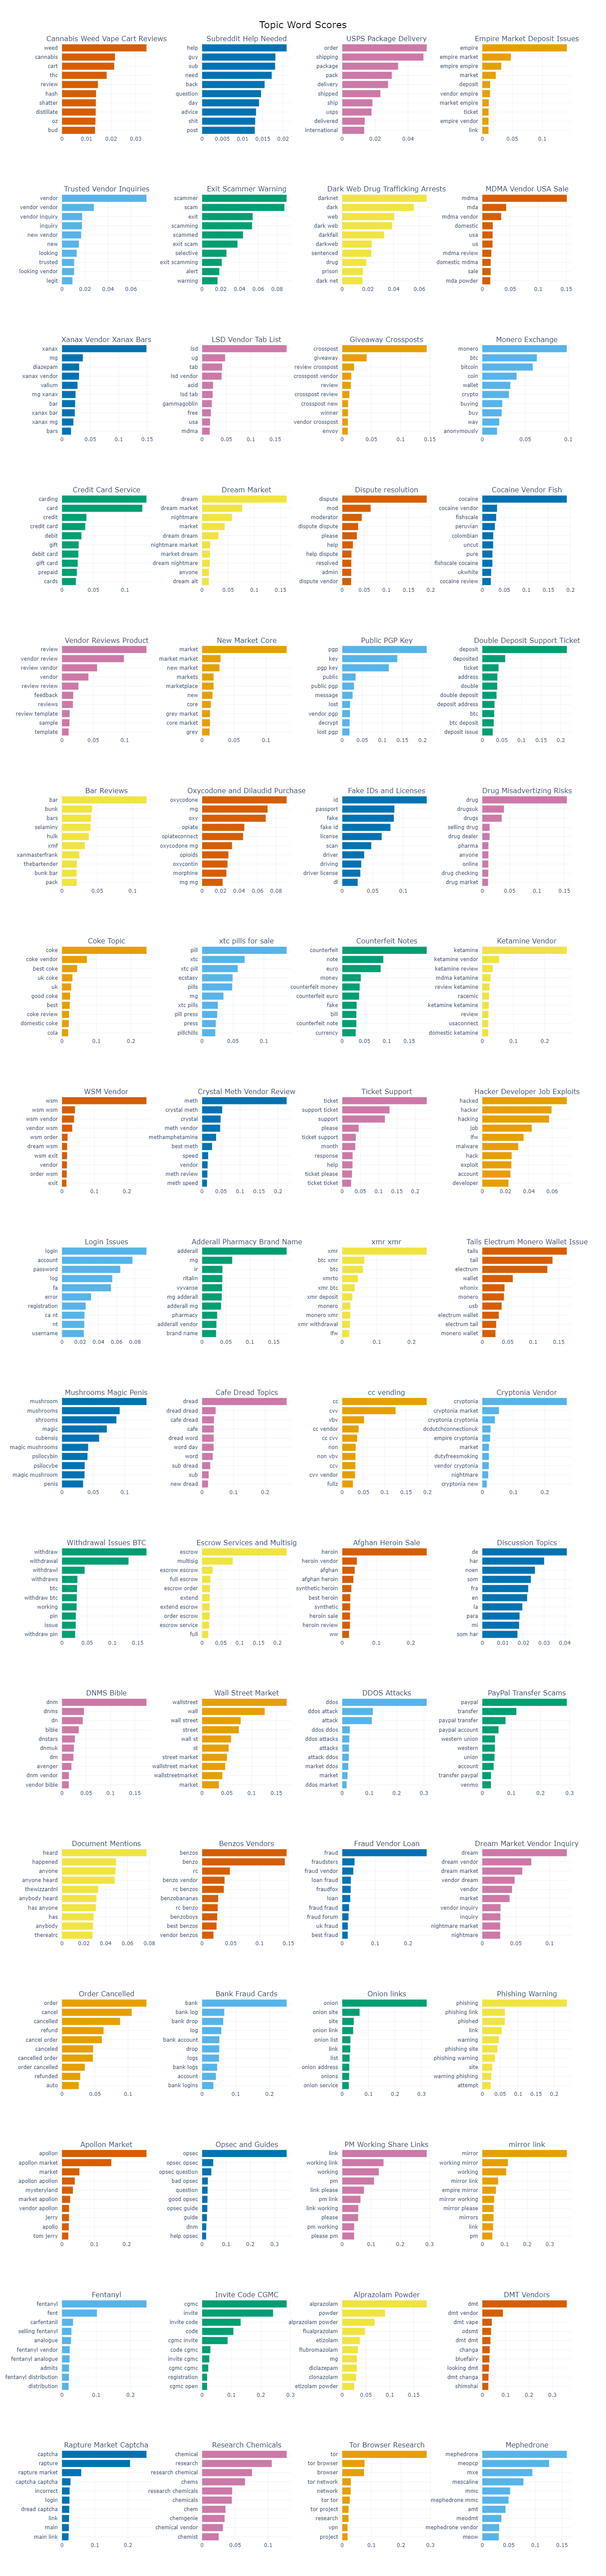

In [48]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10, width=1250, height=700, custom_labels=True)

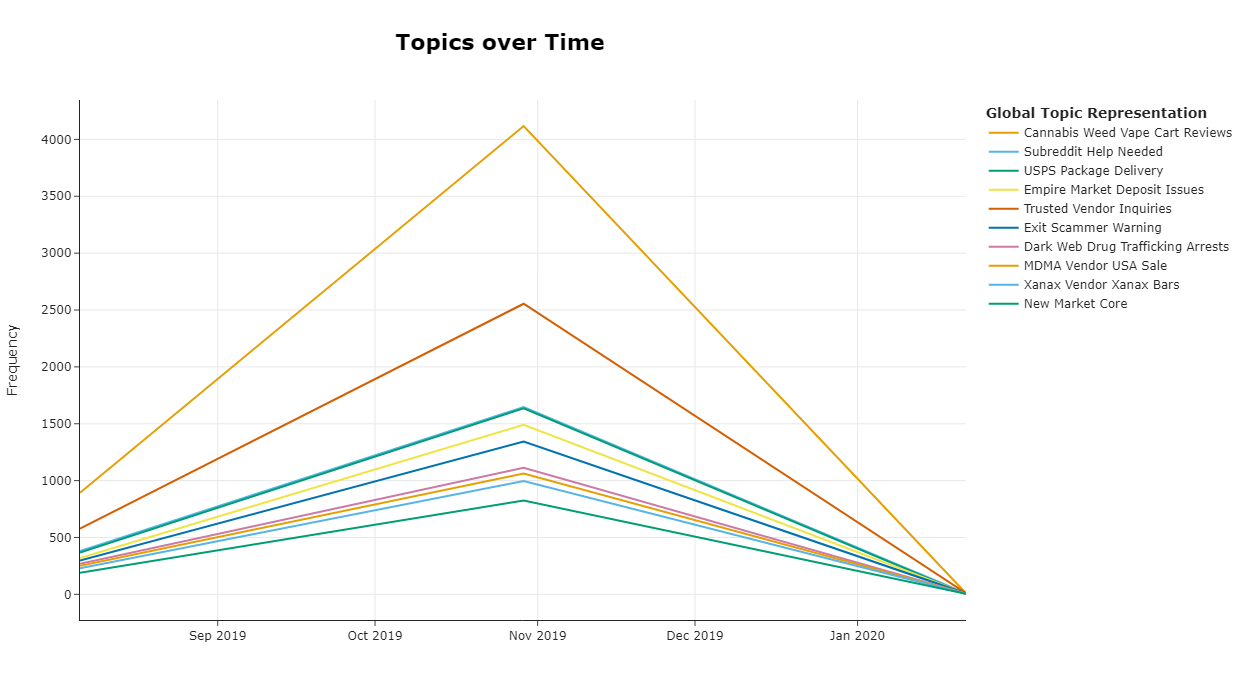

# Predict Models - Usage

In [2]:
topic_model = BERTopic.load("../../../Analyze_files/CombiningAnalysisCompleteDataset/ThreadAnalysis/Models/topic_model_all-MiniLM-L6-v2_150_20n", embedding_model='all-MiniLM-L6-v2')

In [6]:
sentence = ['recently closed Samsara market']
predict_topic(topic_model, sentence, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(cryptonia, 0.270593329016721), (cryptonia ma...",0.002991,Cryptonia Vendor,"[cryptonia, cryptonia market, cryptonia crypto...",recently closed Samsara market
1,"[(empire, 0.1408905571475779), (empire market,...",0.002262,Empire Market Deposit Issues,"[empire, empire market, empire empire, market,...",recently closed Samsara market
2,"[(wallstreet, 0.17075397467717646), (wall, 0.1...",0.002127,Wall Street Market,"[wallstreet, wall, wall street, street, wall s...",recently closed Samsara market
3,"[(scammer, 0.09029491748260987), (scam, 0.0879...",0.002075,Exit Scammer Warning,"[scammer, scam, exit, scamming, scammed, exit ...",recently closed Samsara market
4,"[(crosspost, 0.14470709618860572), (giveaway, ...",0.002045,Giveaway Crossposts,"[crosspost, giveaway, review crosspost, crossp...",recently closed Samsara market


In [7]:
sentence = ['i want to buy some pgp keys']
predict_topic(topic_model, sentence, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 19.48it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(pgp, 0.2106338648158133), (key, 0.1374706728...",1.0,Public PGP Key,"[pgp, key, pgp key, public, public pgp, messag...",i want to buy some pgp keys
1,"[(mephedrone, 0.15930437837531358), (meopcp, 0...",0.0,Mephedrone,"[mephedrone, meopcp, mxe, mescaline, mmc, meph...",i want to buy some pgp keys
2,"[(coke, 0.24480516496483845), (coke vendor, 0....",0.0,Coke Topic,"[coke, coke vendor, best coke, uk coke, uk, go...",i want to buy some pgp keys
3,"[(deposit, 0.21545306050516058), (deposited, 0...",0.0,Double Deposit Support Ticket,"[deposit, deposited, ticket, address, double, ...",i want to buy some pgp keys
4,"[(bar, 0.11981212043710264), (bunk, 0.04275809...",0.0,Bar Reviews,"[bar, bunk, bars, selaminy, hulk, xmf, xanmast...",i want to buy some pgp keys


In [8]:
sentence = ['atk hack']
predict_topic(topic_model, sentence, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(hacked, 0.07268774210946359), (hacker, 0.059...",1.0,Hacker Developer Job Exploits,"[hacked, hacker, hacking, job, lfw, malware, h...",atk hack
1,"[(mephedrone, 0.15930437837531358), (meopcp, 0...",0.0,Mephedrone,"[mephedrone, meopcp, mxe, mescaline, mmc, meph...",atk hack
2,"[(coke, 0.24480516496483845), (coke vendor, 0....",0.0,Coke Topic,"[coke, coke vendor, best coke, uk coke, uk, go...",atk hack
3,"[(pgp, 0.2106338648158133), (key, 0.1374706728...",0.0,Public PGP Key,"[pgp, key, pgp key, public, public pgp, messag...",atk hack
4,"[(deposit, 0.21545306050516058), (deposited, 0...",0.0,Double Deposit Support Ticket,"[deposit, deposited, ticket, address, double, ...",atk hack


In [9]:
sentence = ['milk and coffe cutting']
predict_topic(topic_model, sentence, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 35.80it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(cocaine, 0.19185759141507205), (cocaine vend...",0.130156,Cocaine Vendor Fish,"[cocaine, cocaine vendor, fishscale, peruvian,...",milk and coffe cutting
1,"[(coke, 0.24480516496483845), (coke vendor, 0....",0.115240,Coke Topic,"[coke, coke vendor, best coke, uk coke, uk, go...",milk and coffe cutting
2,"[(heroin, 0.24667865086560822), (heroin vendor...",0.083335,Afghan Heroin Sale,"[heroin, heroin vendor, afghan, afghan heroin,...",milk and coffe cutting
3,"[(drug, 0.15474318847411217), (drugsuk, 0.0399...",0.080116,Drug Misadvertizing Risks,"[drug, drugsuk, drugs, selling drug, drug deal...",milk and coffe cutting
4,"[(pill, 0.13687679139191483), (xtc, 0.06894292...",0.020120,xtc pills for sale,"[pill, xtc, xtc pill, ecstasy, pills, mg, xtc ...",milk and coffe cutting


In [10]:
sentence = ['tobacco shop']
predict_topic(topic_model, sentence, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 36.41it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(weed, 0.034440655421142205), (cannabis, 0.02...",0.004004,Cannabis Weed Vape Cart Reviews,"[weed, cannabis, cart, thc, review, hash, shat...",tobacco shop
1,"[(chemical, 0.12788227993451434), (research, 0...",0.002419,Research Chemicals,"[chemical, research, research chemical, chems,...",tobacco shop
2,"[(mephedrone, 0.15930437837531358), (meopcp, 0...",0.002269,Mephedrone,"[mephedrone, meopcp, mxe, mescaline, mmc, meph...",tobacco shop
3,"[(coke, 0.24480516496483845), (coke vendor, 0....",0.002243,Coke Topic,"[coke, coke vendor, best coke, uk coke, uk, go...",tobacco shop
4,"[(cocaine, 0.19185759141507205), (cocaine vend...",0.002178,Cocaine Vendor Fish,"[cocaine, cocaine vendor, fishscale, peruvian,...",tobacco shop


In [11]:
sentence = ['kush']
predict_topic(topic_model, sentence, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 44.30it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(weed, 0.034440655421142205), (cannabis, 0.02...",0.852803,Cannabis Weed Vape Cart Reviews,"[weed, cannabis, cart, thc, review, hash, shat...",kush
1,"[(review, 0.13479635045612737), (vendor review...",0.000019,Vendor Reviews Product,"[review, vendor review, review vendor, vendor,...",kush
2,"[(chemical, 0.12788227993451434), (research, 0...",0.000019,Research Chemicals,"[chemical, research, research chemical, chems,...",kush
3,"[(mephedrone, 0.15930437837531358), (meopcp, 0...",0.000018,Mephedrone,"[mephedrone, meopcp, mxe, mescaline, mmc, meph...",kush
4,"[(heard, 0.07747679742838355), (happened, 0.04...",0.000017,Document Mentions,"[heard, happened, anyone, anyone heard, thewiz...",kush


In [12]:
sentence = ['berlusconi']
predict_topic(topic_model, sentence, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 33.26it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(scammer, 0.09029491748260987), (scam, 0.0879...",0.002465,Exit Scammer Warning,"[scammer, scam, exit, scamming, scammed, exit ...",berlusconi
1,"[(dream, 0.16188938874288553), (dream market, ...",0.002430,Dream Market,"[dream, dream market, nightmare, market, dream...",berlusconi
2,"[(dream, 0.1256863407223506), (dream vendor, 0...",0.002413,Dream Market Vendor Inquiry,"[dream, dream vendor, dream market, vendor dre...",berlusconi
3,"[(de, 0.04104874164468111), (har, 0.0300428126...",0.002389,Discussion Topics,"[de, har, noen, som, fra, en, la, para, mi, so...",berlusconi
4,"[(heard, 0.07747679742838355), (happened, 0.04...",0.002385,Document Mentions,"[heard, happened, anyone, anyone heard, thewiz...",berlusconi


In [13]:
sentence = ['id and pw']
predict_topic(topic_model, sentence, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 39.22it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(id, 0.1385509849376173), (passport, 0.085687...",9.550908e-01,Fake IDs and Licenses,"[id, passport, fake, fake id, license, scan, d...",id and pw
1,"[(counterfeit, 0.18938590987283574), (note, 0....",4.611858e-19,Counterfeit Notes,"[counterfeit, note, euro, money, counterfeit m...",id and pw
2,"[(fraud, 0.25672448642865076), (fraudsters, 0....",1.421706e-19,Fraud Vendor Loan,"[fraud, fraudsters, fraud vendor, loan fraud, ...",id and pw
3,"[(bank, 0.25097424693158105), (bank log, 0.066...",1.307981e-19,Bank Fraud Cards,"[bank, bank log, bank drop, log, bank account,...",id and pw
4,"[(cc, 0.19850827602610305), (cvv, 0.1255948081...",1.196949e-19,cc vending,"[cc, cvv, vbv, cc vendor, cc cvv, non, non vbv...",id and pw


In [14]:
sentence = ['mannitis']
predict_topic(topic_model, sentence, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 38.19it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(mdma, 0.15108386628760112), (mda, 0.04291624...",0.095744,MDMA Vendor USA Sale,"[mdma, mda, mdma vendor, domestic, usa, us, md...",mannitis
1,"[(pill, 0.13687679139191483), (xtc, 0.06894292...",0.013045,xtc pills for sale,"[pill, xtc, xtc pill, ecstasy, pills, mg, xtc ...",mannitis
2,"[(ketamine, 0.27076491836153055), (ketamine ve...",0.008951,Ketamine Vendor,"[ketamine, ketamine vendor, ketamine review, m...",mannitis
3,"[(meth, 0.22276036172115224), (crystal meth, 0...",0.008680,Crystal Meth Vendor Review,"[meth, crystal meth, crystal, meth vendor, met...",mannitis
4,"[(drug, 0.15474318847411217), (drugsuk, 0.0399...",0.008224,Drug Misadvertizing Risks,"[drug, drugsuk, drugs, selling drug, drug deal...",mannitis


In [15]:
sentence = ['flight to colombia']
predict_topic(topic_model, sentence, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 29.37it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(cocaine, 0.19185759141507205), (cocaine vend...",0.591885,Cocaine Vendor Fish,"[cocaine, cocaine vendor, fishscale, peruvian,...",flight to colombia
1,"[(coke, 0.24480516496483845), (coke vendor, 0....",0.027078,Coke Topic,"[coke, coke vendor, best coke, uk coke, uk, go...",flight to colombia
2,"[(heroin, 0.24667865086560822), (heroin vendor...",0.007295,Afghan Heroin Sale,"[heroin, heroin vendor, afghan, afghan heroin,...",flight to colombia
3,"[(drug, 0.15474318847411217), (drugsuk, 0.0399...",0.006366,Drug Misadvertizing Risks,"[drug, drugsuk, drugs, selling drug, drug deal...",flight to colombia
4,"[(meth, 0.22276036172115224), (crystal meth, 0...",0.003539,Crystal Meth Vendor Review,"[meth, crystal meth, crystal, meth vendor, met...",flight to colombia


In [16]:
sentence = ['flight to Afghanistan']
predict_topic(topic_model, sentence, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 37.16it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(heroin, 0.24667865086560822), (heroin vendor...",0.849733,Afghan Heroin Sale,"[heroin, heroin vendor, afghan, afghan heroin,...",flight to Afghanistan
1,"[(drug, 0.15474318847411217), (drugsuk, 0.0399...",0.000012,Drug Misadvertizing Risks,"[drug, drugsuk, drugs, selling drug, drug deal...",flight to Afghanistan
2,"[(cocaine, 0.19185759141507205), (cocaine vend...",0.000011,Cocaine Vendor Fish,"[cocaine, cocaine vendor, fishscale, peruvian,...",flight to Afghanistan
3,"[(coke, 0.24480516496483845), (coke vendor, 0....",0.000008,Coke Topic,"[coke, coke vendor, best coke, uk coke, uk, go...",flight to Afghanistan
4,"[(fentanyl, 0.24680043197686974), (fent, 0.102...",0.000004,Fentanyl,"[fentanyl, fent, carfentanil, selling fentanyl...",flight to Afghanistan


In [17]:
sentence = ['Fentanyl']
predict_topic(topic_model, sentence, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 36.89it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(fentanyl, 0.24680043197686974), (fent, 0.102...",1.0,Fentanyl,"[fentanyl, fent, carfentanil, selling fentanyl...",Fentanyl
1,"[(mephedrone, 0.15930437837531358), (meopcp, 0...",0.0,Mephedrone,"[mephedrone, meopcp, mxe, mescaline, mmc, meph...",Fentanyl
2,"[(coke, 0.24480516496483845), (coke vendor, 0....",0.0,Coke Topic,"[coke, coke vendor, best coke, uk coke, uk, go...",Fentanyl
3,"[(pgp, 0.2106338648158133), (key, 0.1374706728...",0.0,Public PGP Key,"[pgp, key, pgp key, public, public pgp, messag...",Fentanyl
4,"[(deposit, 0.21545306050516058), (deposited, 0...",0.0,Double Deposit Support Ticket,"[deposit, deposited, ticket, address, double, ...",Fentanyl


# Hugging Face

In [ ]:
topic_model.push_to_hf_hub(
    repo_id="D0men1c0/ISSR_Dark_Web_68Topics",
    save_embedding_model='all-MiniLM-L6-v2',
    save_ctfidf=True
)

In [4]:
topic_model = BERTopic.load("D0men1c0/ISSR_Dark_Web_68Topics")

In [6]:
sentence = ['Fentanyl']
topic, _ = topic_model.transform(sentence)
topic_model.get_topic_info(topic[0])

Batches: 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]
2024-07-31 13:26:10,296 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,60,221,60_fentanyl_fent_carfentanil_selling fentanyl,Fentanyl,"[fentanyl, fent, carfentanil, selling fentanyl...",NaN
